# Image Identifier using ResNet
Using the resnet101 function, we’ll now instantiate a 101-layer convolutional neural
network. Just to put things in perspective, before the advent of residual networks in
2015, achieving stable training at such depths was considered extremely hard. Residual
networks pulled a trick that made it possible, and by doing so, beat several benchmarks
in one sweep that year.
Let’s create an instance of the network now. We’ll pass an argument that will
instruct the function to download the weights of resnet101 trained on the ImageNet
dataset, with 1.2 million images and 1,000 categories:

## Importing required packages
The predefined models can be found in **torchvision.models**

In [1]:
from torchvision import models

We can take a look at the actual models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

The capitalized names refer to Python classes that implement a number of popular
models. They differ in their architecture—that is, in the arrangement of the operations
occurring between the input and the output. The lowercase names are convenience
functions that return models instantiated from those classes, sometimes with different
parameter sets. For instance, resnet101 returns an instance of ResNet with 101 layers,
resnet18 has 18 layers, and so on

In order to run the ResNet architecture on an input image, we can create an
instance of the ResNet class

We’ll pass an argument that will instruct the function to **download the weights of resnet101 trained on the ImageNet
dataset, with 1.2 million images and 1,000 categories**:

In [3]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /Users/kavishjadwani/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


While we’re staring at the download progress, we can take a minute to appreciate that
resnet101 sports **44.5 million parameters**
that’s a lot of parameters to optimize
automatically!

In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

What we are seeing here is modules, one per line.Note that they have nothing in common
with Python modules **they are individual operations, the building blocks of a
neural network. They are also called layers in other deep learning frameworks.**

If we scroll down, we’ll see a lot of Bottleneck modules repeating one after the
other (101 of them!), containing convolutions and other modules. That’s the anatomy
of a typical deep neural network for computer vision: a more or less sequential
cascade of filters and nonlinear functions, ending with a layer (fc) producing scores
for each of the 1,000 output classes (out_features).

The resnet variable can be called **like a function**, taking as input one or more
images and producing an equal number of scores for each of the 1,000 ImageNet
classes. Before we can do that, however, we have to **preprocess the input images** so
they are the **right size** and so that their values **(colors) sit roughly in the same numerical
range**  
In order to do that, the torchvision module provides **transforms, which
allow us to quickly define pipelines of basic preprocessing functions**:

In [5]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In this case, we defined a preprocess function that will scale the input image to 256 ×
256, crop the image to 224 × 224 around the center, **transform it to a tensor** (a
PyTorch multidimensional array: in this case, a 3D array with **color, height, and width**), and normalize its RGB (red, green, blue) components so that they have
defined means and standard deviations.  
These need to match what was presented to
the network during training, if we want the network to produce meaningful answers.  
ToTensor() works for the image, whose elements are in range 0 to 255. You can write your custom Transforms to suit your needs.(0.485, 0.456, 0.406) is the normalized mean value of ImageNet, and 0.229, 0.224, 0.225 denotes the std deviation of ImageNet.


## We can now grab a picture of our favorite dog preprocess it, and then see what ResNet thinks of it.

We can start by loading an image from the local filesystem using Pillow (https://pillow.readthedocs.io/en/stable), an
image-manipulation module for Python

In [6]:
from PIL import Image
img = Image.open("golden.jpg")

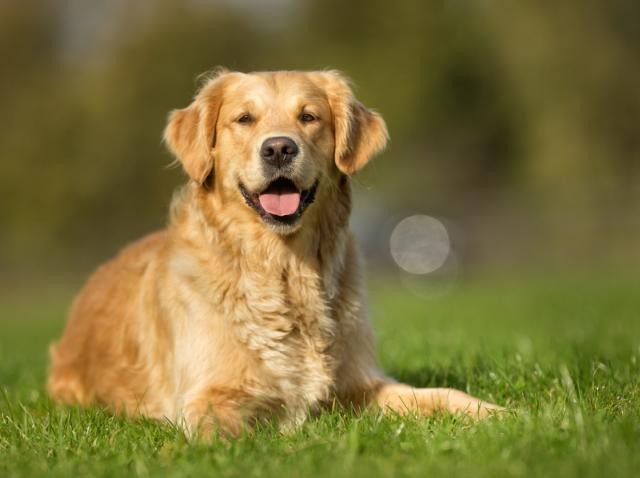

In [7]:
img

pass the image through a preprocessing pipeline

In [8]:
img_t = preprocess(img)

Then we can reshape, crop, and normalize the input tensor in a way that the network
expects

In [9]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

## Do Inference 
The process of running a trained model on new data is called **inference** in deep learning
circles. In order to do inference, we need to put the network in **eval mode**

In [10]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

If we forget to do that, some pretrained models, like batch normalization and dropout,
will not produce meaningful answers, just because of the way they work internally.
Now that eval has been set, we’re ready for inference:

In [11]:
out = resnet(batch_t)
out

tensor([[ 2.5995e-01, -1.0944e+00, -3.2843e+00, -3.2974e+00, -4.1995e+00,
         -2.0565e+00, -5.3847e+00, -1.8117e+00,  5.2950e-01, -2.7216e+00,
          1.5109e+00,  2.0568e-02,  2.8681e-01, -1.2576e+00, -9.6092e-01,
         -5.2507e-01, -3.0197e-01, -1.4461e+00, -1.7985e+00, -1.6291e+00,
         -2.0871e+00,  1.8226e-01, -1.8182e+00,  5.6630e-01, -9.4324e-01,
          1.8025e-01, -1.7370e-01,  3.1501e-02, -5.4489e-02, -6.3368e-01,
         -3.2207e-01, -1.6641e+00,  1.6232e-01, -2.0531e+00, -1.3456e+00,
         -7.6907e-01, -4.0856e-01, -1.8056e+00,  4.6871e-01, -1.7433e-01,
          2.0252e-01,  2.4035e-01,  2.1287e+00, -3.9561e-01,  3.0024e-01,
         -4.4599e-01,  7.7533e-01,  1.3152e+00, -1.7827e+00, -3.8216e-01,
         -2.5211e+00, -5.6402e-01,  9.1661e-01,  4.6422e-01, -9.6529e-01,
         -1.1215e+00, -5.5096e-01, -2.6797e-01, -1.3222e+00,  2.2344e-01,
          1.2612e+00, -2.1484e+00,  2.0320e-01,  8.9293e-03, -3.8469e-01,
         -2.0840e+00,  6.4066e-01,  5.

A staggering set of operations involving 44.5 million parameters has just happened, producing
a vector of 1,000 scores, one per ImageNet class. That didn’t take long, did it?  

We now need to find out the label of the class that received the highest score. This
will tell us what the model saw in the image. If the label matches how a human would
describe the image, that’s great! It means everything is working. If not, then either something
went wrong during training, or the image is so different from what the model
expects that the model can’t process it properly, or there’s some other similar issue.  

To see the list of predicted labels, **we will load a text file listing the labels in the
same order they were presented to the network during training**, and then we will pick
out the label at the **index that produced the highest score from the network**. Almost
all models meant for image recognition have output in a form similar to what we’re
about to work with.  

Let’s load the file containing the 1,000 labels for the ImageNet dataset classes

In [12]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

At this point, we need to determine the index corresponding to the maximum score
in the out tensor we obtained previously. We can do that using the max function in
PyTorch, which outputs the maximum value in a tensor as well as the indices where
that maximum value occurred:

In [14]:
_, index = torch.max(out, 1)

We can now use the index to access the label. Here, index is not a plain Python number,
but a one-element, one-dimensional tensor, so we
need to get the actual numerical value to use as an index into our labels list using
index. We also use torch.nn.functional.softmax to normalize
our outputs to the range (0, 1), and divide by the sum. That gives us something
roughly akin to the confidence that the model has in its prediction.

In [15]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 85.2094955444336)

In this case, the
model is 85% certain that it knows what it’s looking at is a golden retriever:

Since the model produced scores, we can also find out what the second best, third
best, and so on were. To do this, we can use the sort function, which sorts the values
in ascending or descending order and also provides the indices of the sorted values in
the original array

In [16]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 85.2094955444336),
 ('Leonberg', 2.853865146636963),
 ('Sussex spaniel', 1.6339832544326782),
 ('clumber, clumber spaniel', 1.144046664237976),
 ('otterhound, otter hound', 0.9640847444534302)]

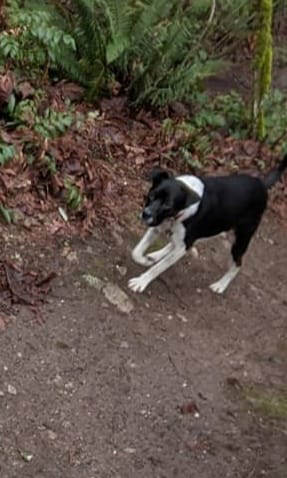

In [18]:
img2 = Image.open("unknown.jpeg")
img2

In [20]:
img_t2 = preprocess(img2)
batch_t2 = torch.unsqueeze(img_t2, 0)
resnet.eval()
out2 = resnet(batch_t2)
with open('imagenet_classes.txt') as f:
    labels2 = [line.strip() for line in f.readlines()]
_, index2 = torch.max(out2, 1)
percentage2 = torch.nn.functional.softmax(out2, dim=1)[0] * 100
labels2[index2[0]], percentage[index2[0]].item()



('Italian greyhound', 0.00011765940871555358)

In [21]:
_, indices2 = torch.sort(out2, descending=True)
[(labels2[idx], percentage2[idx].item()) for idx in indices2[0][:5]]

[('Italian greyhound', 49.42398452758789),
 ('Boston bull, Boston terrier', 28.228965759277344),
 ('whippet', 7.567697525024414),
 ('basenji', 6.094883918762207),
 ('toy terrier', 2.171668767929077)]